In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fsolve
import plotly.express as px
import csv

#One round game

In [ ]:
grid_size = 10
c_a_values = np.linspace(0.1,0.9,grid_size)
c_b_values = np.linspace(0.1,0.9,grid_size)
r_values = np.linspace(0.1,0.9,grid_size)

c_b_values = c_a_values

c_a, c_b, r = np.meshgrid(c_a_values, c_b_values, r_values, indexing='ij')

valid_indices = np.where((c_a > c_b) & (r > 0) & (r < 1))
c_a_valid = c_a[valid_indices]
r_valid = r[valid_indices]

c_b_valid = c_a[valid_indices]


# for i in range(len(c_a_valid)):
#   print(f"c_a: {c_a_valid[i]}, c_b: {c_b_valid[i]}, r: {r_valid[i]}")

data_to_append = list(zip(c_a_valid, c_b_valid, r_valid))
header_list = ['c_a', 'c_b', "r"]

file_name = "one_shot_simulation.csv"

# write data to csv file
with open(file_name, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(header_list)
        writer.writerows(data_to_append)

data = pd.read_csv("one_shot_simulation.csv")

In [ ]:
# wages calculation
def wa_wb(vars, ca, cb, r):
  wa, wb = vars
  # V = 1
  epsilon = 1e-10
  eq1 = wa - (1-wa) * r * (wb/(cb + epsilon))**r
  eq2 = wb - (1-wb) * r * (wa/(ca + epsilon))**r
  return [eq1, eq2]

results_wa_wb = []

for index, row in data.iterrows():
  ca = row['c_a']
  cb = row['c_b']
  r = row['r']

  w_a, w_b = fsolve(wa_wb, [0.5,0.5], args =(ca, cb, r))
  results_wa_wb.append([w_a, w_b])

header_list.extend(['w_a','w_b'])
data['w_a'] = [result[0] for result in results_wa_wb]
data['w_b'] = [result[1] for result in results_wa_wb]
data.to_csv("one_shot_simulation.csv", header=header_list, index=False)

In [ ]:
# effort level calculation
def xa_xb(vars, wa, wb, ca, cb, r):
  xa, xb = vars
  eq1 = xa - (wa/ca) * (r*(ca*cb*wa*wb)**r) / ((wa**r * cb**r + wb**r * ca**r)**2)
  eq2 = xb - (wb/cb) * (r*(ca*cb*wa*wb)**r) / ((wa**r * cb**r + wb**r * ca**r)**2)
  return [eq1, eq2]

results_xa_xb = []

for index, row in data.iterrows():
  wa = row['w_a']
  wb = row['w_b']
  ca = row['c_a']
  cb = row['c_b']
  r = row['r']

  x_a, x_b = fsolve(xa_xb, [0.5,0.5], args =(wa, wb, ca, cb, r))
  results_xa_xb.append([x_a, x_b])

header_list.extend(['x_a','x_b'])
data['x_a'] = [result[0] for result in results_xa_xb]
data['x_b'] = [result[1] for result in results_xa_xb]
data.to_csv("one_shot_simulation.csv", header=header_list, index=False)

In [ ]:
# winning probability calculation
def win_prob(vars, wa, wb, ca, cb, r):
  win_a, win_b = vars
  eq1 = win_a - (wa/ca)**r/((wa/ca)**r+(wb/cb)**r)
  eq2 = win_b - (wb/cb)**r/((wa/ca)**r+(wb/cb)**r)
  return [eq1, eq2]

results_win_prob = []

for index, row in data.iterrows():
  wa = row['w_a']
  wb = row['w_b']
  ca = row['c_a']
  cb = row['c_b']
  r = row['r']

  win_a, win_b = fsolve(win_prob, [0.5,0.5], args =(wa, wb, ca, cb, r))
  results_win_prob.append([win_a, win_b])

header_list.extend(['win_a','win_b'])
data['win_a'] = [result[0] for result in results_win_prob]
data['win_b'] = [result[1] for result in results_win_prob]
data.to_csv("one_shot_simulation.csv", header=header_list, index=False)

In [ ]:
# # winning probability calculation
# def win_prob2(vars, xa, xb, r):
#   win_a, win_b = vars
#   eq1 = win_a - xa**r/(xa**r+xb**r)
#   eq2 = win_b - xb**r/(xa**r+xb**r)
#   return [eq1, eq2]

# results_win_prob2 = []

# for index, row in data.iterrows():
#   xa = row['x_a']
#   xb = row['x_b']
#   r = row['r']

#   win_a2, win_b2 = fsolve(win_prob2, [0.5,0.5], args =(xa, xb, r))
#   results_win_prob2.append([win_a2, win_b2])

# header_list.extend(['win_a2','win_b2'])
# data['win_a2'] = [result[0] for result in results_win_prob2]
# data['win_b2'] = [result[1] for result in results_win_prob2]
# data.to_csv("one_shot_simulation.csv", header=header_list, index=False)

In [ ]:
# manager's expected payoff
def expected_payoff_manager(vars, wa, wb, win_a, win_b):
  payoff_managerA, payoff_managerB = vars
  # Suppose V=1
  eq1 = payoff_managerA - (1-wa)*win_a
  eq2 = payoff_managerB - (1-wb)*win_b
  return [eq1, eq2]

results_manager_payoff = []

for index, row in data.iterrows():
  wa = row['w_a']
  wb = row['w_b']
  wina = row['win_a']
  winb = row['win_b']

  payoff_managerA, payoff_managerB = fsolve(expected_payoff_manager, [0.5,0.5], args =(wa,wb,wina,winb))
  results_manager_payoff.append([payoff_managerA, payoff_managerB])

header_list.extend(['manager_a','manager_a'])
data['manager_a'] = [result[0] for result in results_manager_payoff]
data['manager_b'] = [result[1] for result in results_manager_payoff]
data.to_csv("one_shot_simulation.csv", header=header_list, index=False)

In [ ]:
!pip install plotly

### The Relationship Between Cost, Discriminatory Power, and Wages

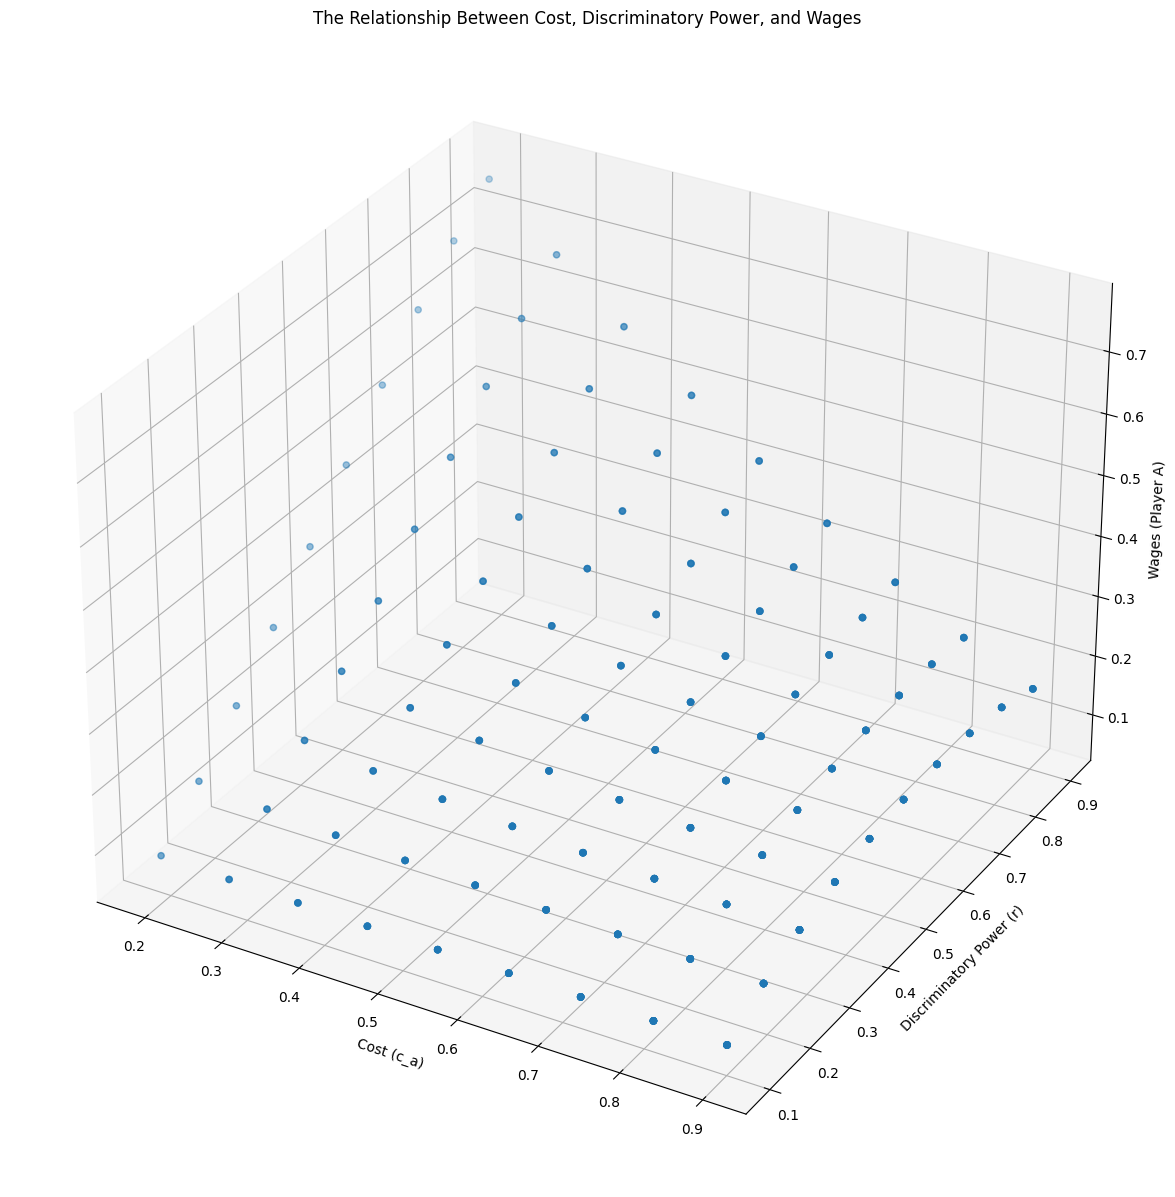

In [ ]:
x = data['c_a']
y = data['r']
z = data['w_a']

fig = plt.figure(figsize=(15, 15))

c_r_expPayoff = fig.add_subplot(111, projection='3d')

c_r_expPayoff.scatter(x, y, z)

c_r_expPayoff.set_xlabel('Cost (c_a)')
c_r_expPayoff.set_ylabel('Discriminatory Power (r)')
c_r_expPayoff.set_zlabel('Wages (Player A)')

c_r_expPayoff.set_title("The Relationship Between Cost, Discriminatory Power, and Wages")

plt.show()

In [ ]:
x = data['c_a']
y = data['r']
z = data['w_a']

fig = px.scatter_3d(data, x='c_a', y='r', z='w_a',
                    title="The Relationship Between Cost, Discriminatory Power, and Wages",
                    labels={'c_a': 'Cost (c_a)', 'r': 'Discriminatory Power (r)', 'w_a': 'Wages (Player A)'})

fig.show()

### The Relationship Between Cost, Discriminatory Power, and Manager's Expected Payoff


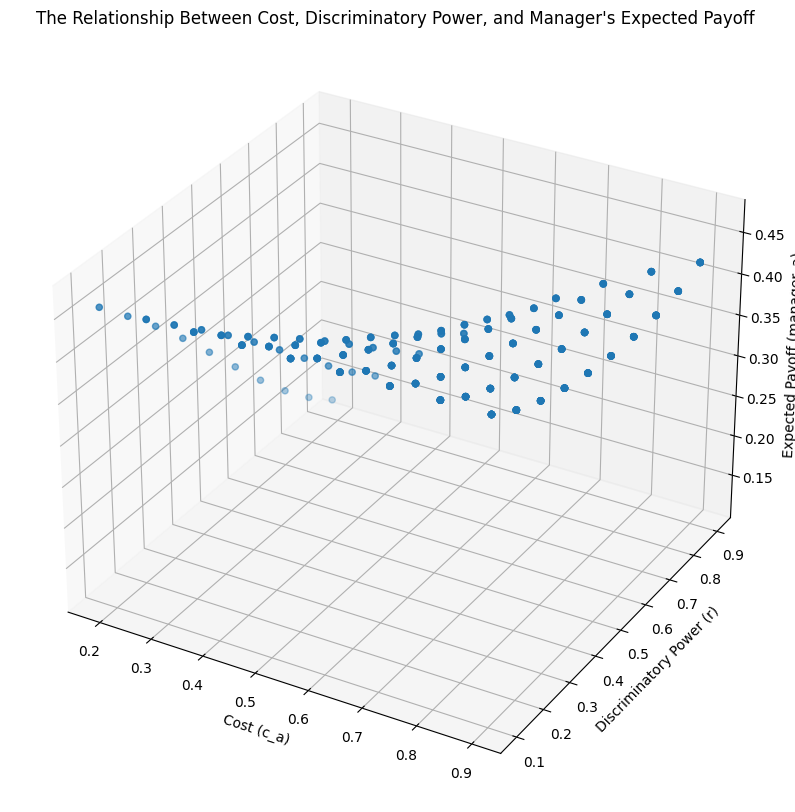

In [ ]:
x = data['c_a']
y = data['r']
z = data['manager_a']

fig = plt.figure(figsize=(10, 10))

c_r_expPayoff = fig.add_subplot(111, projection='3d')

c_r_expPayoff.scatter(x, y, z)

c_r_expPayoff.set_xlabel('Cost (c_a)')
c_r_expPayoff.set_ylabel('Discriminatory Power (r)')
c_r_expPayoff.set_zlabel('Expected Payoff (manager_a)')

c_r_expPayoff.set_title("The Relationship Between Cost, Discriminatory Power, and Manager's Expected Payoff")

plt.show()

In [ ]:
x = data['c_a']
y = data['r']
z = data['manager_a']

fig = px.scatter_3d(data, x='c_a', y='r', z='manager_a',
                    title="The Relationship Between Cost, Discriminatory Power, and Manager's Payoff",
                    labels={'c_a': 'Cost(c_a)', 'r': 'Discriminatory Power (r)', 'manager': 'Manager\'s Payoff(manager_a)'})

fig.show()

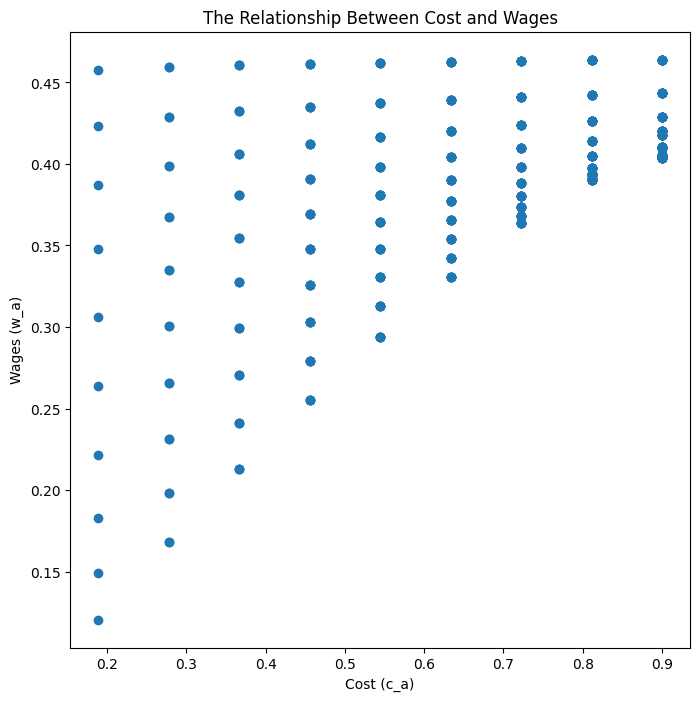

In [ ]:
x = data['c_a']
y = data['manager_a']

fig = plt.figure(figsize=(8, 8))
c_r_expPayoff = fig.add_subplot(111)  # Corrected to add a regular 2D subplot

c_r_expPayoff.scatter(x, y)

c_r_expPayoff.set_xlabel('Cost (c_a)')
c_r_expPayoff.set_ylabel('Wages (w_a)')
c_r_expPayoff.set_title("The Relationship Between Cost and Wages")

plt.show()

### The Relationship between Discriminatory Power and Wages



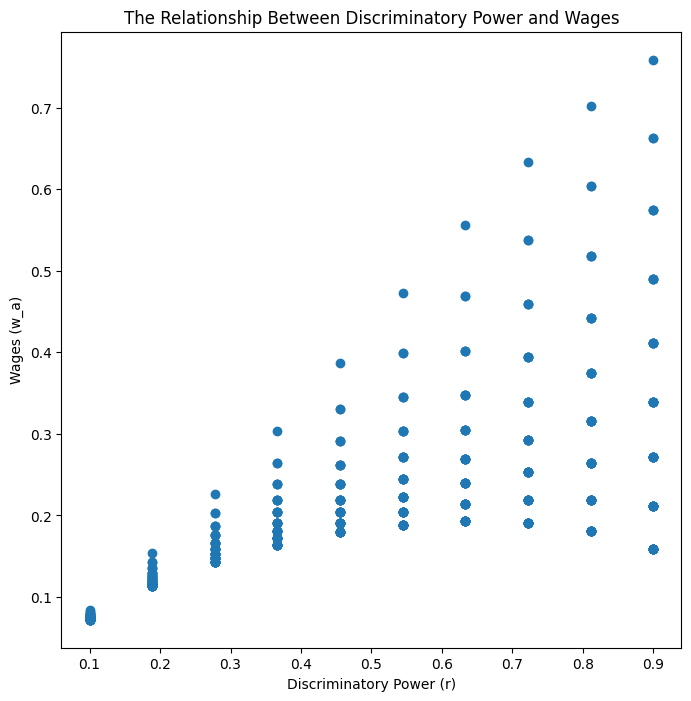

In [ ]:
x = data['r']
y = data['w_a']

fig = plt.figure(figsize=(8, 8))
c_r_expPayoff = fig.add_subplot(111)  # Corrected to add a regular 2D subplot

c_r_expPayoff.scatter(x, y)

c_r_expPayoff.set_xlabel('Discriminatory Power (r)')
c_r_expPayoff.set_ylabel('Wages (w_a)')
c_r_expPayoff.set_title("The Relationship Between Discriminatory Power and Wages")

plt.show()

### The Relationship between Discriminatory Power and Manager's Payoff

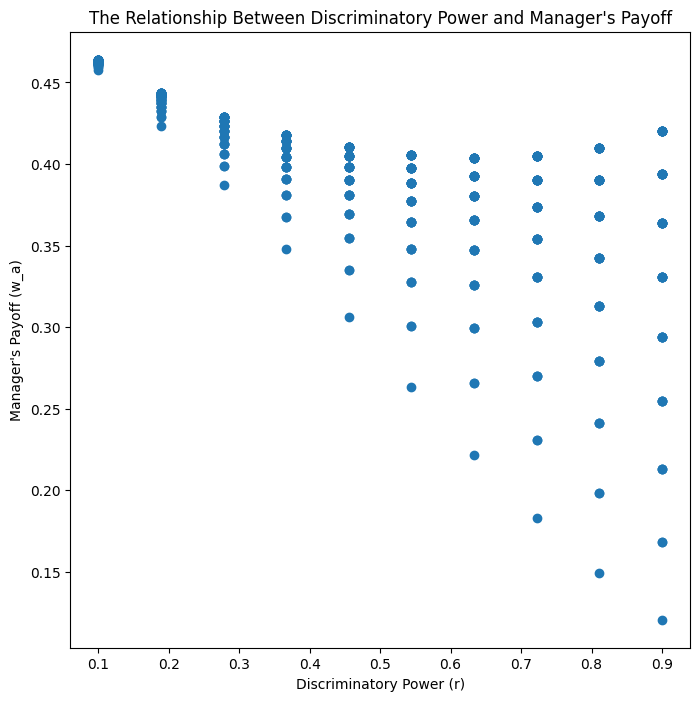

In [ ]:
x = data['r']
y = data['manager_a']

fig = plt.figure(figsize=(8,8))
c_r_expPayoff = fig.add_subplot(111)  # Corrected to add a regular 2D subplot

c_r_expPayoff.scatter(x, y)

c_r_expPayoff.set_xlabel('Discriminatory Power (r)')
c_r_expPayoff.set_ylabel('Manager\'s Payoff (w_a)')
c_r_expPayoff.set_title("The Relationship Between Discriminatory Power and Manager's Payoff")

plt.show()

# Best of three with fixed order

In [ ]:
# define values for cost c and discriminatory power r
grid_size = 3
c_a1_values = np.linspace(0.6,0.9,grid_size)
c_a2_values = np.linspace(0.3,0.6,grid_size)
c_a3_values = np.linspace(0.1,0.3,grid_size)
r_values = np.linspace(0.1,0.9,grid_size)

c_b1_values = c_a1_values
c_b2_values = c_a2_values
c_b3_values = c_a3_values

c_a1, c_a2, c_a3, r = np.meshgrid(c_a1_values, c_a2_values, c_a3_values, r_values, indexing='ij')

valid_indices = np.where((c_a1 > c_a2) & (c_a2 > c_a3) & (r > 0) & (r < 1))
c_a1_valid = c_a1[valid_indices]
c_a2_valid = c_a2[valid_indices]
c_a3_valid = c_a3[valid_indices]
r_valid = r[valid_indices]

c_b1_valid = c_a1_valid
c_b2_valid = c_a2_valid
c_b3_valid = c_a3_valid


#for i in range(len(c_a1_valid)):
    #print(f"c_a1: {c_a1_valid[i]}, c_a2: {c_a2_valid[i]}, c_a3: {c_a3_valid[i]}, r: {r_valid[i]}")

#for j in range(len(c_b1_valid)):
    #print(f"c_b1: {c_b1_valid[j]}, c_b2: {c_b2_valid[j]}, c_b3: {c_b3_valid[j]}, r: {r_valid[j]}")

data_to_append = list(zip(c_a1_valid, c_a2_valid, c_a3_valid, c_b1_valid, c_b2_valid, c_b3_valid, r_valid))
header_list = ['c_a1', 'c_a2', 'c_a3', 'c_b1', 'c_b2', 'c_b3', "r"]

file_name = "best_of_three_fixed_simulation.csv"

# write data to csv file
with open(file_name, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(header_list)
        writer.writerows(data_to_append)

data = pd.read_csv("best_of_three_fixed_simulation.csv")

# add headers to the csv file
#data.to_csv("best_of_three_fixed_simulation.csv", header=header_list, index=False)

# equations for stages
def wa_wb_11(vars, ca, cb, r):
  wa, wb = vars
  eq1 = wa - (1-wa) * r * (wb/cb)**r
  eq2 = wb - (1-wb) * r * (wa/ca)**r
  return [eq1, eq2]

def wa_wb_equations(vars, ca, cb, r):
  wa, wb = vars
  eq1 = wa - r/(r+(cb/wb)**r)
  eq2 = wb - r/(r+(ca/wa)**r)
  return [eq1, eq2]

results_11 = []
for index, row in data.iterrows():
  ca = row['c_a3']
  cb = row['c_b3']
  r = row['r']

  w_a11, w_b11 = fsolve(wa_wb_11, [0.5,0.5], args =(ca, cb, r))
  results_11.append([w_a11, w_b11])

header_list.extend(['w_a11','w_b11'])
data['w_a11'] = [result[0] for result in results_11]
data['w_b11'] = [result[1] for result in results_11]
data.to_csv("best_of_three_fixed_simulation.csv", header=header_list, index=False)

# stage (1,0)
results_10 = []
for index, row in data.iterrows():
  ca = row['c_a2']
  cb = row['c_b2']
  r = row['r']

  w_a10, w_b10 = fsolve(wa_wb_equations, [0.5,0.5], args =(ca, cb, r))
  results_10.append([w_a10, w_b10])

data['w_a10'] = [result[0] for result in results_10]
data['w_b10'] = [result[1] for result in results_10]
header_list.extend(['w_a10', 'w_b10'])

# stage (0,1)
results_01 = []
for index, row in data.iterrows():
  ca = row['c_a2']
  cb = row['c_b2']
  r = row['r']

  w_a01, w_b01 = fsolve(wa_wb_equations, [0.5,0.5], args =(ca, cb, r))
  results_01.append([w_a01, w_b01])

data['w_a01'] = [result[0] for result in results_01]
data['w_b01'] = [result[1] for result in results_01]
header_list.extend(['w_a01', 'w_b01'])

# stage (0,0)
results_00 = []
for index, row in data.iterrows():
  ca = row['c_a1']
  cb = row['c_b1']
  r = row['r']

  w_a00, w_b00 = fsolve(wa_wb_equations, [0.5,0.5], args =(ca, cb, r))
  results_00.append([w_a00, w_b00])

data['w_a00'] = [result[0] for result in results_00]
data['w_b00'] = [result[1] for result in results_00]
header_list.extend(['w_a00', 'w_b00'])


data.to_csv("best_of_three_fixed_simulation.csv", header=header_list, index=False)


In [ ]:
"""
DRAFT Version

all_choices = {0.3, 0.6, 0.9}

for c_a1 in [0.3,0.6,0.9]:
  for c_b1 in [0.3,0.6,0.9]:
    for c_a3 in [0.3,0.6,0.9]:
      if c_a3 != c_a1:
        for c_b3 in [0.3,0.6,0.9]:
          if c_b3 != c_b1:
            ca2_choices = all_choices - {c_a1, c_a3}
            cb2_choices = all_choices - {c_b1, c_b3}
            for c_b2 in cb2_choices:
              for c_a2 in ca2_choices:
                print(c_a1, c_b1, c_a2, c_b2, c_a3, c_b3)
"""

import pandas as pd
from scipy.optimize import fsolve
import numpy as np

#ca and cb are c_a3, c_b3 here
def wa_wb_11(vars, ca, cb, r):
    wa_11, wb_11 = vars
    eq1 = wa_11 - (1 - wa_11) * r * (wb_11 / cb)**r
    eq2 = wb_11 - (1 - wb_11) * r * (wa_11 / ca)**r
    return [eq1, eq2]

def v11a(wa_11, wb_11, ca, cb, r):
    return (1 - wa_11) * (wa_11**r / ca**r) / (wa_11**r / ca**r + wb_11**r / cb**r)

def v11b(wa_11, wb_11, ca, cb, r):
    return (1 - wb_11) * (wb_11**r / cb**r) / (wa_11**r / ca**r + wb_11**r / cb**r)

# all possible choices
all_choices = {0.3, 0.6, 0.9}

combinations = []

for c_a1 in all_choices:
    for c_b1 in all_choices:
        for c_a3 in all_choices - {c_a1}:
            for c_b3 in all_choices - {c_b1}:
                ca2_choices = all_choices - {c_a1, c_a3}
                cb2_choices = all_choices - {c_b1, c_b3}
                for c_a2 in ca2_choices:
                    for c_b2 in cb2_choices:
                        initial_guess = [0.5, 0.5]
                        r = 0.99
                        wa_11, wb_11 = fsolve(wa_wb_11, initial_guess, args=(c_a3, c_b3, r))

                        def combined_equations(vars):
                            wa_11, wb_11, wa_10, wb_10, wa_01, wb_01 = vars
                            eq1 = wa_11 - (1 - wa_11) * r * (wb_11 / c_b3)**r
                            eq2 = wb_11 - (1 - wb_11) * r * (wa_11 / c_a3)**r
                            eq3 = (1 - wa_10 - v11a(wa_11, wb_11, c_a3, c_b3, r)) * r * (wb_10**r / c_b2**r) - wa_10
                            eq4 = (v11b(wa_11, wb_11, c_a3, c_b3, r) - wb_10) * r * (wa_10**r/ c_a2**r) - wb_10
                            eq5 = (v11a(wa_11, wb_11, c_a3, c_b3, r) - wa_01) * r * (wb_01**r / c_b2**r) - wa_01
                            eq6 = (1 - v11b(wa_11, wb_11, c_a3, c_b3, r) - wb_01) * r * (wa_01**r / c_a2**r) - wb_01
                            return [eq1, eq2, eq3, eq4, eq5, eq6]

                        initial_guess_extended = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
                        result = fsolve(combined_equations, initial_guess_extended, xtol=1e-10, maxfev=10000)
                        wa_11, wb_11, wa_10, wb_10, wa_01, wb_01 = result

                        combinations.append([c_a1, c_b1, c_a2, c_b2, c_a3, c_b3, wa_11, wb_11, wa_10, wb_10, wa_01, wb_01])


df = pd.DataFrame(combinations, columns=['c_a1', 'c_b1', 'c_a2', 'c_b2', 'c_a3', 'c_b3', 'wa_11', 'wb_11', 'wa_10', 'wb_10', 'wa_01', 'wb_01'])

print(df)











    c_a1  c_b1  c_a2  c_b2  c_a3  c_b3     wa_11     wb_11         wa_10  \
0    0.3   0.3   0.9   0.9   0.6   0.6  0.396446  0.396446  1.098546e-12   
1    0.3   0.3   0.9   0.6   0.6   0.9  0.242368  0.287520  5.293992e-17   
2    0.3   0.3   0.6   0.9   0.9   0.6  0.287520  0.242368  4.732597e-12   
3    0.3   0.3   0.6   0.6   0.9   0.9  0.109832  0.109832  1.527841e-09   
4    0.3   0.6   0.9   0.9   0.6   0.3  0.624931  0.507563  1.049558e-12   
5    0.3   0.6   0.9   0.3   0.6   0.9  0.242368  0.287520  7.728460e-10   
6    0.3   0.6   0.6   0.9   0.9   0.3  0.556230  0.380730  2.378941e-10   
7    0.3   0.6   0.6   0.3   0.9   0.9  0.109832  0.109832  9.360044e-02   
8    0.3   0.9   0.9   0.6   0.6   0.3  0.624931  0.507563  8.747514e-13   
9    0.3   0.9   0.9   0.3   0.6   0.6  0.396446  0.396446  1.274018e-06   
10   0.3   0.9   0.6   0.6   0.9   0.3  0.556230  0.380730  1.493163e-02   
11   0.3   0.9   0.6   0.3   0.9   0.6  0.287520  0.242368  1.531425e-01   
12   0.6   0

<ipython-input-1-b25ad09ea2f7>:62: RuntimeWarning: invalid value encountered in scalar power
  eq4 = (v11b(wa_11, wb_11, c_a3, c_b3, r) - wb_10) * r * (wa_10**r/ c_a2**r) - wb_10
<ipython-input-1-b25ad09ea2f7>:63: RuntimeWarning: invalid value encountered in scalar power
  eq5 = (v11a(wa_11, wb_11, c_a3, c_b3, r) - wa_01) * r * (wb_01**r / c_b2**r) - wa_01
<ipython-input-1-b25ad09ea2f7>:61: RuntimeWarning: invalid value encountered in scalar power
  eq3 = (1 - wa_10 - v11a(wa_11, wb_11, c_a3, c_b3, r)) * r * (wb_10**r / c_b2**r) - wa_10
<ipython-input-1-b25ad09ea2f7>:64: RuntimeWarning: invalid value encountered in scalar power
  eq6 = (1 - v11b(wa_11, wb_11, c_a3, c_b3, r) - wb_01) * r * (wa_01**r / c_a2**r) - wb_01


In [ ]:
"""
1. After limiting to non-negative, there is no error. This means the wages can also take the value of 0.
When the wages are negative, a non-integer power can lead to complex numbers.
"""

import pandas as pd
from scipy.optimize import fsolve
import numpy as np

def wa_wb_11(vars, ca, cb, r):
    wa_11, wb_11 = vars
    eq1 = wa_11 - (1 - wa_11) * r * (wb_11 / cb)**r
    eq2 = wb_11 - (1 - wb_11) * r * (wa_11 / ca)**r
    return [eq1, eq2]

def v11a(wa_11, wb_11, ca, cb, r):
    return (1 - wa_11) * (wa_11**r / ca**r) / (wa_11**r / ca**r + wb_11**r / cb**r)

def v11b(wa_11, wb_11, ca, cb, r):
    return (1 - wb_11) * (wb_11**r / cb**r) / (wa_11**r / ca**r + wb_11**r / cb**r)

all_choices = {0.3, 0.6, 0.9}

# List to store the combinations
combinations = []

# Loop through all combinations
for c_a1 in all_choices:
    for c_b1 in all_choices:
        for c_a3 in all_choices - {c_a1}:
            for c_b3 in all_choices - {c_b1}:
                ca2_choices = all_choices - {c_a1, c_a3}
                cb2_choices = all_choices - {c_b1, c_b3}
                for c_a2 in ca2_choices:
                    for c_b2 in  cb2_choices:
                        initial_guess = [0.5, 0.5]
                        r = 0.9999
                        wa_11, wb_11 = fsolve(wa_wb_11, initial_guess, args=(c_a3, c_b3, r))

                        def combined_equations(vars):
                            wa_11, wb_11, wa_10, wb_10, wa_01, wb_01 = vars
                            if wa_10 < 0 or wb_10 < 0 or wa_01 < 0 or wb_01 < 0:
                                return [np.nan] * 6
                            eq1 = wa_11 - (1 - wa_11) * r * (wb_11 / c_b3)**r
                            eq2 = wb_11 - (1 - wb_11) * r * (wa_11 / c_a3)**r
                            eq3 = (1 - wa_10 - v11a(wa_11, wb_11, c_a3, c_b3, r)) * r * (wb_10**r / c_b2**r) - wa_10
                            eq4 = (v11b(wa_11, wb_11, c_a3, c_b3, r) - wb_10) * r * (wa_10**r / c_a2**r) - wb_10
                            eq5 = (v11a(wa_11, wb_11, c_a3, c_b3, r) - wa_01) * r * (wb_01**r / c_b2**r) - wa_01
                            eq6 = (1 - v11b(wa_11, wb_11, c_a3, c_b3, r) - wb_01) * r * (wa_01**r / c_a2**r) - wb_01
                            return [eq1, eq2, eq3, eq4, eq5, eq6]

                        initial_guess_extended = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
                        wa_11, wb_11, wa_10, wb_10, wa_01, wb_01 = fsolve(combined_equations, initial_guess_extended)

                        v11a_val = v11a(wa_11, wb_11, c_a3, c_b3, r)
                        v11b_val = v11b(wa_11, wb_11, c_a3, c_b3, r)
                        expected_a_10 = (1 - wa_10) * (wa_10**r / c_a2**r) / ((wa_10**r / c_a2**r) + (wb_10**r / c_b2**r)) + v11a_val * (wb_10**r / c_b2**r) / ((wa_10**r / c_a2**r) + (wb_10**r / c_b2**r))
                        expected_b_10 = (v11b_val - wb_10) * (wb_10**r / c_b2**r) / ((wa_10**r / c_a2**r) + (wb_10**r / c_b2**r))
                        expected_a_01 = (v11a_val - wa_01) * (wa_01**r / c_a2**r) / ((wa_01**r / c_a2**r) + (wb_01**r / c_b2**r))
                        expected_b_01 = (1 - wb_01) * (wb_01**r / c_b2**r) / ((wa_01**r / c_a2**r) + (wb_01**r / c_b2**r)) + v11b_val * (wa_01**r / c_a2**r) / ((wa_01**r / c_a2**r) + (wb_01**r / c_b2**r))

                        combinations.append([c_a1, c_b1, c_a2, c_b2, c_a3, c_b3, wa_11, wb_11, wa_10, wb_10, wa_01, wb_01, expected_a_10, expected_b_10, expected_a_01, expected_b_01])

df = pd.DataFrame(combinations, columns=['c_a1', 'c_b1', 'c_a2', 'c_b2', 'c_a3', 'c_b3', 'wa_11', 'wb_11', 'wa_10', 'wb_10', 'wa_01', 'wb_01', 'expected_a_10', 'expected_b_10', 'expected_a_01', 'expected_b_01'])

pd.set_option('display.width', 1000)  # Adjust the width as needed

print(df)

pd.reset_option('display.width')


     c_a1   c_b1   c_a2   c_b2   c_a3   c_b3  wa_11  wb_11  wa_10  wb_10  wa_01  wb_01  expected_a_10  expected_b_10  expected_a_01  expected_b_01
0  0.3000 0.3000 0.9000 0.9000 0.6000 0.6000 0.4000 0.4000 0.0000 0.0000 0.0000 0.0000         0.7231         0.1187         0.1186         0.7233
1  0.3000 0.3000 0.9000 0.6000 0.6000 0.9000 0.2421 0.2875 0.0000 0.0000 0.0000 0.0000         0.7276         0.1487         0.1653         0.7323
2  0.3000 0.3000 0.6000 0.9000 0.9000 0.6000 0.2875 0.2421 0.0000 0.0000 0.0000 0.0000         0.7323         0.1653         0.1487         0.7276
3  0.3000 0.3000 0.6000 0.6000 0.9000 0.9000 0.1001 0.1001 0.0000 0.0000 0.0000 0.0000         0.7405         0.2123         0.2123         0.7405
4  0.3000 0.6000 0.9000 0.9000 0.6000 0.3000 0.6307 0.5125 0.0000 0.0000 0.0000 0.0000         0.6790         0.1128         0.0474         0.7645
5  0.3000 0.6000 0.9000 0.3000 0.6000 0.9000 0.2421 0.2875 0.0000 0.0000 0.0203 0.0151         0.6761         0.1767  

In [ ]:
payoff_matrices = []
for i in range(0, len(df), 4):
    group = df.iloc[i:i+4]
    ca1, cb1 = group.iloc[0]['c_a1'], group.iloc[0]['c_b1']
    matrix_10 = pd.DataFrame()
    matrix_01 = pd.DataFrame()

    for j in range(len(group)):
        ca2, cb2 = group.iloc[j]['c_a2'], group.iloc[j]['c_b2']
        if ca2 != ca1 and cb2 != cb1 and not np.isnan(ca2) and not np.isnan(cb2):
            matrix_10.loc[cb2, ca2] = f"{group.iloc[j]['expected_a_10']:.6f}, {group.iloc[j]['expected_b_10']:.6f}"
            matrix_01.loc[cb2, ca2] = f"{group.iloc[j]['expected_a_01']:.6f}, {group.iloc[j]['expected_b_01']:.6f}"

    if ca1 in matrix_10.columns and cb1 in matrix_10.index:
        matrix_10 = matrix_10.drop(columns=ca1, index=cb1)
    if ca1 in matrix_01.columns and cb1 in matrix_01.index:
        matrix_01 = matrix_01.drop(columns=ca1, index=cb1)

    payoff_matrices.append((ca1, cb1, matrix_10, matrix_01))

print("Expected payoffs for Team A are the first value and the ones for Team V are the second value in all cells.")
for ca1, cb1, matrix_10, matrix_01 in payoff_matrices:
    print(f"\nPayoff Matrix for c_a1={ca1}, c_b1={cb1} when r={r}:")
    print("\nExpected payoffs for Team A and Team B if Team A wins the first round (expected_a_10, expected_b_10):")
    print(matrix_10.rename_axis('Team A Choice in Round 2', axis=1).rename_axis('Team B Choice in Round 2', axis=0))
    print("\nExpected payoffs for Team A and Team B if Team B wins the first round (expected_a_01, expected_b_01):")
    print(matrix_01.rename_axis('Team A Choice in Round 2', axis=1).rename_axis('Team B Choice in Round 2', axis=0))
    print()



Expected payoffs for Team A are the first value and the ones for Team V are the second value in all cells.

Payoff Matrix for c_a1=0.3, c_b1=0.3 when r=0.3:

Expected payoffs for Team A and Team B if Team A wins the first round (expected_a_10, expected_b_10):
Team A Choice in Round 2                 0.9                 0.6
Team B Choice in Round 2                                        
0.9                       0.685223, 0.174965  0.685291, 0.175509
0.6                       0.685722, 0.175624  0.684356, 0.176808

Expected payoffs for Team A and Team B if Team B wins the first round (expected_a_01, expected_b_01):
Team A Choice in Round 2                 0.9                 0.6
Team B Choice in Round 2                                        
0.9                       0.174965, 0.685223  0.175624, 0.685722
0.6                       0.175509, 0.685291  0.176808, 0.684356

Expected payoffs for Team A are the first value and the ones for Team V are the second value in all cells.

Payoff M

In [ ]:
pip install nashpy


In [ ]:
from nashpy import Game

"""
game matrix

the payoff of A is the first number and the one of B is the second number
the strategies of A are on the row and the ones of B are on the column

B                 0.6              0.9
A
0.6     0.684356, 0.176808    0.685291, 0.175509
0.9     0.685722, 0.175624    0.685223, 0.174965
"""

# payoffs matrix for Team A
payoffs_a = [[0.684356, 0.685291], #first row in the matrix
             [0.685722, 0.685223]] #second row

# payoffs matrix for Team B (negative values for a zero-sum game)
payoffs_b = [[0.176808, 0.175509],
             [0.175624, 0.174965]]

game = Game(payoffs_a, payoffs_b)


# find the Nash equilibrium
equilibria = game.support_enumeration()

for eq in equilibria:
    print("Nash Equilibrium when c_a1=0.3, c_b1=0.3 when A wins in the first round:")
    print("Strategy for Team A:", eq[0])
    print("Strategy for Team B:", eq[1])
    print("Payoffs:", game[eq])
    print()



Nash Equilibrium when c_a1=0.3, c_b1=0.3 when A wins in the first round:
Strategy for Team A: [0. 1.]
Strategy for Team B: [1. 0.]
Payoffs: [0.685722 0.175624]



In [ ]:
from nashpy import Game

payoffs_a = [[0.176808, 0.175624],
             [0.175509, 0.174965]]

payoffs_b = [[0.684356, 0.685722],
             [0.685291, 0.685223]]

game = Game(payoffs_a, payoffs_b)

equilibria = game.support_enumeration()

for eq in equilibria:
    print("Nash Equilibrium when c_a1=0.3, c_b1=0.3 when B wins the first round:")
    print("Strategy for Team A:", eq[0])
    print("Strategy for Team B:", eq[1])
    print("Payoffs:", game[eq])
    print()



Nash Equilibrium when c_a1=0.3, c_b1=0.3 when B wins the first round:
Strategy for Team A: [1. 0.]
Strategy for Team B: [0. 1.]
Payoffs: [0.175624 0.685722]



In [ ]:
import pandas as pd
from scipy.optimize import fsolve
import numpy as np

def wa_wb_11(vars, ca, cb, r):
    wa_11, wb_11 = vars
    eq1 = wa_11 - (1 - wa_11) * r * (wb_11 / cb)**r
    eq2 = wb_11 - (1 - wb_11) * r * (wa_11 / ca)**r
    return [eq1, eq2]

def v11a(wa_11, wb_11, ca, cb, r):
    return (1 - wa_11) * (wa_11**r / ca**r) / (wa_11**r / ca**r + wb_11**r / cb**r)

def v11b(wa_11, wb_11, ca, cb, r):
    return (1 - wb_11) * (wb_11**r / cb**r) / (wa_11**r / ca**r + wb_11**r / cb**r)

all_choices = {0.3, 0.6, 0.9}

combinations = []

for c_a1 in all_choices:
    for c_b1 in all_choices:
        for c_a3 in all_choices - {c_a1}:
            for c_b3 in all_choices - {c_b1}:
                ca2_choices = all_choices - {c_a1, c_a3}
                cb2_choices = all_choices - {c_b1, c_b3}
                for c_a2 in ca2_choices:
                    for c_b2 in cb2_choices:
                        initial_guess = [0.5, 0.5]
                        r = 0.99
                        wa_11, wb_11 = fsolve(wa_wb_11, initial_guess, args=(c_a3, c_b3, r), maxfev=5000)

                        def combined_equations(vars):
                            wa_11, wb_11, wa_10, wb_10, wa_01, wb_01, wa_00, wb_00 = vars
                            if any(var < 0 for var in [wa_10, wb_10, wa_01, wb_01, wa_00, wb_00]):
                                return [np.nan] * 8
                            eq1 = wa_11 - (1 - wa_11) * r * (wb_11 / c_b3)**r
                            eq2 = wb_11 - (1 - wb_11) * r * (wa_11 / c_a3)**r
                            eq3 = (1 - wa_10 - v11a(wa_11, wb_11, c_a3, c_b3, r)) * r * (wb_10**r / c_b2**r) - wa_10
                            eq4 = (v11b(wa_11, wb_11, c_a3, c_b3, r) - wb_10) * r * (wa_10**r / c_a2**r) - wb_10
                            eq5 = (v11a(wa_11, wb_11, c_a3, c_b3, r) - wa_01) * r * (wb_01**r / c_b2**r) - wa_01
                            eq6 = (1 - v11b(wa_11, wb_11, c_a3, c_b3, r) - wb_01) * r * (wa_01**r / c_a2**r) - wb_01

                            v11a_val = v11a(wa_11, wb_11, c_a3, c_b3, r)
                            v11b_val = v11b(wa_11, wb_11, c_a3, c_b3, r)
                            expected_a_10 = (1 - wa_10) * (wa_10**r / c_a2**r) / ((wa_10**r / c_a2**r) + (wb_10**r / c_b2**r)) + v11a_val * (wb_10**r / c_b2**r) / ((wa_10**r / c_a2**r) + (wb_10**r / c_b2**r))
                            expected_b_10 = (v11b_val - wb_10) * (wb_10**r / c_b2**r) / ((wa_10**r / c_a2**r) + (wb_10**r / c_b2**r))
                            expected_a_01 = (v11a_val - wa_01) * (wa_01**r / c_a2**r) / ((wa_01**r / c_a2**r) + (wb_01**r / c_b2**r))
                            expected_b_01 = (1 - wb_01) * (wb_01**r / c_b2**r) / ((wa_01**r / c_a2**r) + (wb_01**r / c_b2**r)) + v11b_val * (wa_01**r / c_a2**r) / ((wa_01**r / c_a2**r) + (wb_01**r / c_b2**r))

                            eq7 = (expected_a_10 - expected_a_01 - wa_00) * r * (wb_00**r / c_b1**r) - wa_00
                            eq8 = (expected_b_01 - expected_b_10 - wb_00) * r * (wa_00**r / c_a1**r) - wb_00
                            return [eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8]

                        initial_guess_extended = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
                        solution = fsolve(combined_equations, initial_guess_extended, maxfev=5000)
                        wa_11, wb_11, wa_10, wb_10, wa_01, wb_01, wa_00, wb_00 = solution

                        v11a_val = v11a(wa_11, wb_11, c_a3, c_b3, r)
                        v11b_val = v11b(wa_11, wb_11, c_a3, c_b3, r)
                        expected_a_10 = (1 - wa_10) * (wa_10**r / c_a2**r) / ((wa_10**r / c_a2**r) + (wb_10**r / c_b2**r)) + v11a_val * (wb_10**r / c_b2**r) / ((wa_10**r / c_a2**r) + (wb_10**r / c_b2**r))
                        expected_b_10 = (v11b_val - wb_10) * (wb_10**r / c_b2**r) / ((wa_10**r / c_a2**r) + (wb_10**r / c_b2**r))
                        expected_a_01 = (v11a_val - wa_01) * (wa_01**r / c_a2**r) / ((wa_01**r / c_a2**r) + (wb_01**r / c_b2**r))
                        expected_b_01 = (1 - wb_01) * (wb_01**r / c_b2**r) / ((wa_01**r / c_a2**r) + (wb_01**r / c_b2**r)) + v11b_val * (wa_01**r / c_a2**r) / ((wa_01**r / c_a2**r) + (wb_01**r / c_b2**r))

                        combinations.append([c_a1, c_b1, c_a2, c_b2, c_a3, c_b3, wa_11, wb_11, wa_10, wb_10, wa_01, wb_01, wa_00, wb_00, expected_a_10, expected_b_10, expected_a_01, expected_b_01])

df = pd.DataFrame(combinations, columns=['c_a1', 'c_b1', 'c_a2', 'c_b2', 'c_a3', 'c_b3', 'wa_11', 'wb_11', 'wa_10', 'wb_10', 'wa_01', 'wb_01', 'wa_00', 'wb_00', 'expected_a_10', 'expected_b_10', 'expected_a_01', 'expected_b_01'])

pd.set_option('display.width', 1000)

pd.options.display.float_format = '{:.4f}'.format


print(df)

pd.reset_option('display.width')


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


     c_a1   c_b1   c_a2   c_b2   c_a3   c_b3  wa_11  wb_11  wa_10  wb_10  wa_01  wb_01  wa_00  wb_00  expected_a_10  expected_b_10  expected_a_01  expected_b_01
0  0.3000 0.3000 0.9000 0.9000 0.6000 0.6000 0.3964 0.3964 0.0000 0.0000 0.0000 0.0000 0.2689 0.2689         0.7009         0.1293         0.1293         0.7009
1  0.3000 0.3000 0.9000 0.6000 0.6000 0.9000 0.2424 0.2875 0.0000 0.0000 0.0000 0.0000 0.2652 0.2719         0.7263         0.1493         0.1657         0.7314
2  0.3000 0.3000 0.6000 0.9000 0.9000 0.6000 0.2875 0.2424 0.0000 0.0000 0.0000 0.0000 0.2719 0.2652         0.7314         0.1657         0.1493         0.7263
3  0.3000 0.3000 0.6000 0.6000 0.9000 0.9000 0.1098 0.1098 0.0000 0.0000 0.0000 0.0000 0.2200 0.2200         0.7348         0.2127         0.2127         0.7348
4  0.3000 0.6000 0.9000 0.9000 0.6000 0.3000 0.6249 0.5076 0.0000 0.0000 0.0000 0.0000 0.1648 0.2226         0.6606         0.1205         0.0515         0.7500
5  0.3000 0.6000 0.9000 0.3000 0.6

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [ ]:
import pandas as pd
from scipy.optimize import fsolve
import numpy as np

def wa_wb_11(vars, ca, cb, r):
    wa_11, wb_11 = vars
    eq1 = wa_11 - (1 - wa_11) * r * (wb_11 / cb)**r
    eq2 = wb_11 - (1 - wb_11) * r * (wa_11 / ca)**r
    return [eq1, eq2]

def v11a(wa_11, wb_11, ca, cb, r):
    return (1 - wa_11) * (wa_11**r / ca**r) / (wa_11**r / ca**r + wb_11**r / cb**r)

def v11b(wa_11, wb_11, ca, cb, r):
    return (1 - wb_11) * (wb_11**r / cb**r) / (wa_11**r / ca**r + wb_11**r / cb**r)

combinations = []

for r in np.arange(0.1, 1.1, 0.1):
    c_a1, c_a2, c_a3 = 0.3, 0.3, 0.3
    c_b1, c_b2, c_b3 = 0.3, 0.3, 0.3

    initial_guess = [0.5, 0.5]
    wa_11, wb_11 = fsolve(wa_wb_11, initial_guess, args=(c_a3, c_b3, r), maxfev=5000)

    def combined_equations(vars):
        wa_11, wb_11, wa_10, wb_10, wa_01, wb_01, wa_00, wb_00 = vars
        if any(var < 0 for var in [wa_10, wb_10, wa_01, wb_01, wa_00, wb_00]):
            return [np.nan] * 8
        eq1 = wa_11 - (1 - wa_11) * r * (wb_11 / c_b3)**r
        eq2 = wb_11 - (1 - wb_11) * r * (wa_11 / c_a3)**r
        eq3 = (1 - wa_10 - v11a(wa_11, wb_11, c_a3, c_b3, r)) * r * (wb_10**r / c_b2**r) - wa_10
        eq4 = (v11b(wa_11, wb_11, c_a3, c_b3, r) - wb_10) * r * (wa_10**r / c_a2**r) - wb_10
        eq5 = (v11a(wa_11, wb_11, c_a3, c_b3, r) - wa_01) * r * (wb_01**r / c_b2**r) - wa_01
        eq6 = (1 - v11b(wa_11, wb_11, c_a3, c_b3, r) - wb_01) * r * (wa_01**r / c_a2**r) - wb_01

        v11a_val = v11a(wa_11, wb_11, c_a3, c_b3, r)
        v11b_val = v11b(wa_11, wb_11, c_a3, c_b3, r)
        expected_a_10 = (1 - wa_10) * (wa_10**r / c_a2**r) / ((wa_10**r / c_a2**r) + (wb_10**r / c_b2**r)) + v11a_val * (wb_10**r / c_b2**r) / ((wa_10**r / c_a2**r) + (wb_10**r / c_b2**r))
        expected_b_10 = (v11b_val - wb_10) * (wb_10**r / c_b2**r) / ((wa_10**r / c_a2**r) + (wb_10**r / c_b2**r))
        expected_a_01 = (v11a_val - wa_01) * (wa_01**r / c_a2**r) / ((wa_01**r / c_a2**r) + (wb_01**r / c_b2**r))
        expected_b_01 = (1 - wb_01) * (wb_01**r / c_b2**r) / ((wa_01**r / c_a2**r) + (wb_01**r / c_b2**r)) + v11b_val * (wa_01**r / c_a2**r) / ((wa_01**r / c_a2**r) + (wb_01**r / c_b2**r))

        eq7 = (expected_a_10 - expected_a_01 - wa_00) * r * (wb_00**r / c_b1**r) - wa_00
        eq8 = (expected_b_01 - expected_b_10 - wb_00) * r * (wa_00**r / c_a1**r) - wb_00
        return [eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8]

    initial_guess_extended = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
    solution = fsolve(combined_equations, initial_guess_extended, maxfev=5000)
    wa_11, wb_11, wa_10, wb_10, wa_01, wb_01, wa_00, wb_00 = solution

    v11a_val = v11a(wa_11, wb_11, c_a3, c_b3, r)
    v11b_val = v11b(wa_11, wb_11, c_a3, c_b3, r)
    expected_a_10 = (1 - wa_10) * (wa_10**r / c_a2**r) / ((wa_10**r / c_a2**r) + (wb_10**r / c_b2**r)) + v11a_val * (wb_10**r / c_b2**r) / ((wa_10**r / c_a2**r) + (wb_10**r / c_b2**r))
    expected_b_10 = (v11b_val - wb_10) * (wb_10**r / c_b2**r) / ((wa_10**r / c_a2**r) + (wb_10**r / c_b2**r))
    expected_a_01 = (v11a_val - wa_01) * (wa_01**r / c_a2**r) / ((wa_01**r / c_a2**r) + (wb_01**r / c_b2**r))
    expected_b_01 = (1 - wb_01) * (wb_01**r / c_b2**r) / ((wa_01**r / c_a2**r) + (wb_01**r / c_b2**r)) + v11b_val * (wa_01**r / c_a2**r) / ((wa_01**r / c_a2**r) + (wb_01**r / c_b2**r))

    combinations.append([r, c_a1, c_b1, c_a2, c_b2, c_a3, c_b3, wa_11, wb_11, wa_10, wb_10, wa_01, wb_01, wa_00, wb_00, expected_a_10, expected_b_10, expected_a_01, expected_b_01])

df = pd.DataFrame(combinations, columns=['r', 'c_a1', 'c_b1', 'c_a2', 'c_b2', 'c_a3', 'c_b3', 'wa_11', 'wb_11', 'wa_10', 'wb_10', 'wa_01', 'wb_01', 'wa_00', 'wb_00', 'expected_a_10', 'expected_b_10', 'expected_a_01', 'expected_b_01'])

pd.set_option('display.width', 1000)

pd.options.display.float_format = '{:.4f}'.format

print(df)

pd.reset_option('display.width')


        r   c_a1   c_b1   c_a2   c_b2   c_a3   c_b3  wa_11  wb_11  wa_10  wb_10  wa_01  wb_01  wa_00  wb_00  expected_a_10  expected_b_10  expected_a_01  expected_b_01
0  0.0010 0.3000 0.3000 0.3000 0.3000 0.3000 0.3000 0.0010 0.0010 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005         0.7495         0.2495         0.2495         0.7495
1  0.1010 0.3000 0.3000 0.3000 0.3000 0.3000 0.3000 0.0813 0.0813 0.0407 0.0350 0.0350 0.0407 0.0379 0.0379         0.7112         0.2106         0.2106         0.7112
2  0.2010 0.3000 0.3000 0.3000 0.3000 0.3000 0.3000 0.1486 0.1486 0.0720 0.0558 0.0558 0.0720 0.0647 0.0647         0.6833         0.1802         0.1802         0.6833
3  0.3010 0.3000 0.3000 0.3000 0.3000 0.3000 0.3000 0.2137 0.2137 0.0986 0.0697 0.0697 0.0986 0.0872 0.0872         0.6606         0.1533         0.1533         0.6606
4  0.4010 0.3000 0.3000 0.3000 0.3000 0.3000 0.3000 0.2809 0.2809 0.1215 0.0785 0.0785 0.1215 0.1079 0.1079         0.6417         0.1283         0.1283        